In [13]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [14]:
# 載入 SavedModel
model_path = 'Model_H' #載入對應欲推論結果之Model
loaded_model = tf.keras.models.load_model(model_path)

In [15]:
# 狗種類別的標籤，須注意順序，以免於顯示結果miss match
labels = ['Maltese_dog','golden_retriever','Labrador_retriever','collie','Border_collie','malamute','Siberian_husky','Samoyed']

In [16]:
# 預處理影像
def preprocess_image(image):
    image = cv2.resize(image, (224, 224))
    # image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [17]:
# 從本機資料夾辨識影像
def predict_from_folder(folder_path):
    images = []
    original_imgs = [] #先建立一個保存原來影像輸入來源的list，以便最後於結果顯示原圖
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        original_imgs.append(image)
        image = preprocess_image(image)
        images.append((file_name, image))
    
    # 預測並顯示結果
    for i, (file_name, image) in enumerate(images):
        prediction = loaded_model.predict(image)
        label_index = np.argmax(prediction)
        label = labels[label_index]
        confidence = prediction[0][label_index]
        plt.imshow(cv2.cvtColor(original_imgs[i], cv2.COLOR_BGR2RGB))  #輸出結果搭配原始輸入影像顯示
        plt.title(f'Image {i+1}: {label} (Confidence: {confidence})')
        plt.axis('off')
        plt.show()
        print(f'Image {file_name}: {label} (Confidence: {confidence})')

1/1 [==============================] - 2s 2s/step


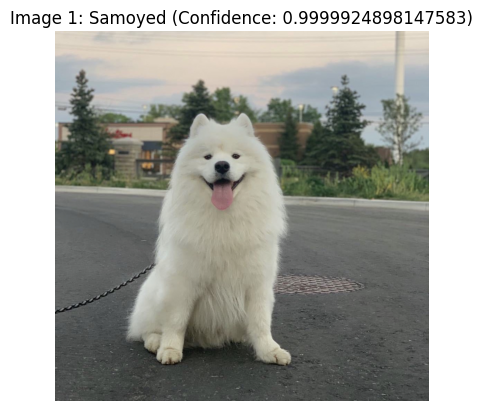

Image IMG_2652.PNG: Samoyed (Confidence: 0.9999924898147583)
1/1 [==============================] - 0s 55ms/step


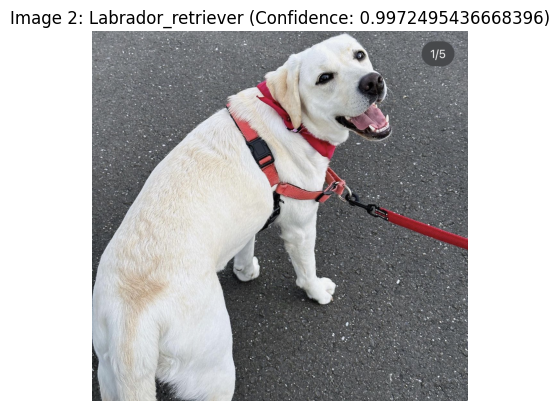

Image IMG_3247.PNG: Labrador_retriever (Confidence: 0.9972495436668396)
1/1 [==============================] - 0s 57ms/step


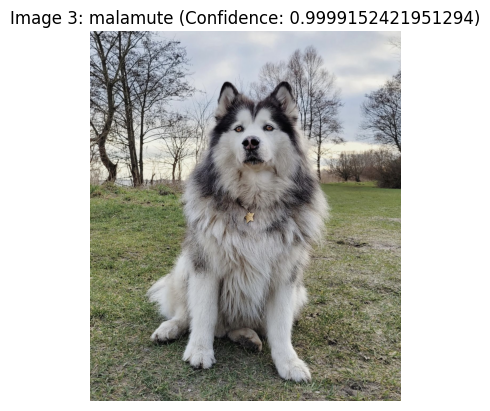

Image IMG_3281.PNG: malamute (Confidence: 0.9999152421951294)
1/1 [==============================] - 0s 54ms/step


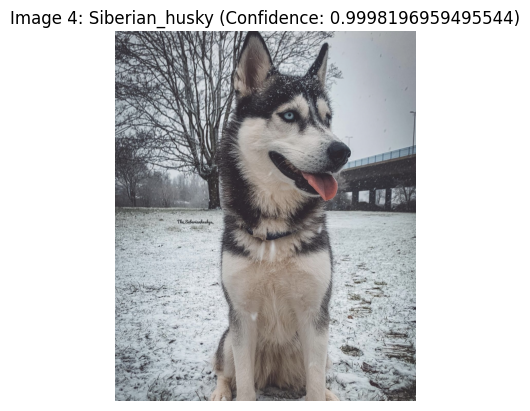

Image IMG_3326.PNG: Siberian_husky (Confidence: 0.9998196959495544)
1/1 [==============================] - 0s 56ms/step


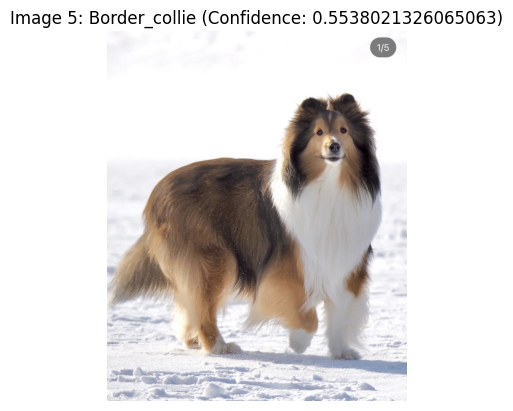

Image IMG_3372.PNG: Border_collie (Confidence: 0.5538021326065063)
1/1 [==============================] - 0s 60ms/step


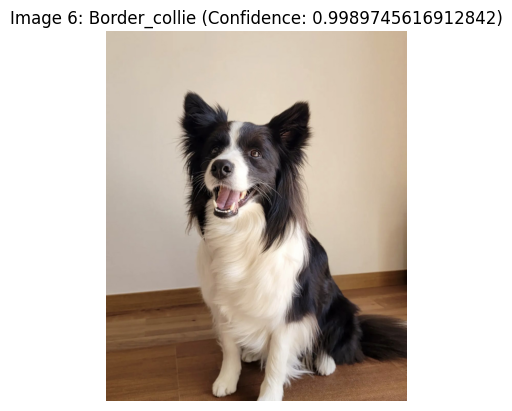

Image IMG_3389.PNG: Border_collie (Confidence: 0.9989745616912842)
1/1 [==============================] - 0s 63ms/step


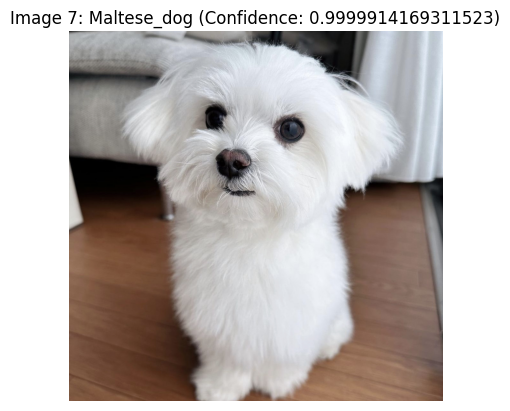

Image IMG_3431.PNG: Maltese_dog (Confidence: 0.9999914169311523)
1/1 [==============================] - 0s 75ms/step


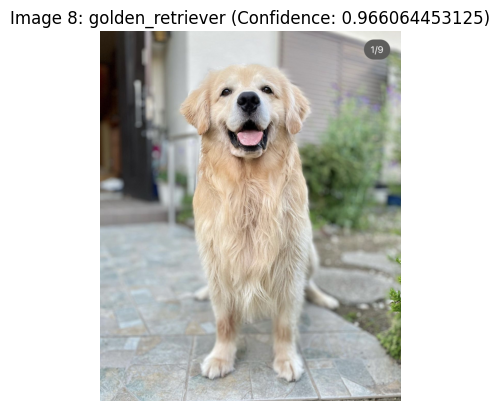

Image IMG_3452.PNG: golden_retriever (Confidence: 0.966064453125)
1/1 [==============================] - 0s 60ms/step


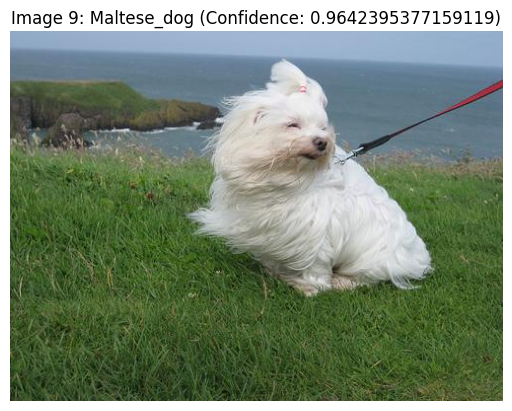

Image n02085936_804.jpg: Maltese_dog (Confidence: 0.9642395377159119)
1/1 [==============================] - 0s 51ms/step


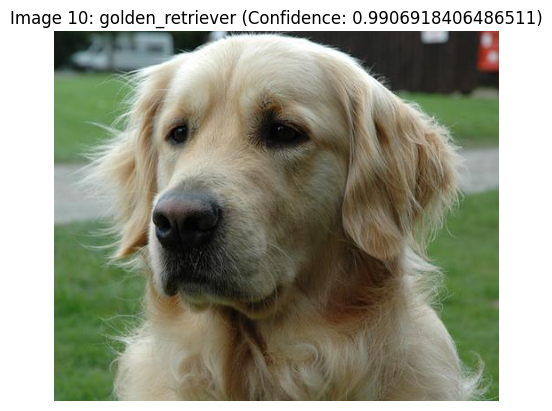

Image n02099601_146.jpg: golden_retriever (Confidence: 0.9906918406486511)
1/1 [==============================] - 0s 79ms/step


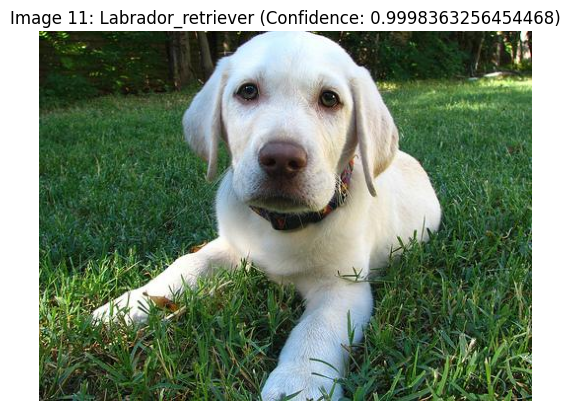

Image n02099712_610.jpg: Labrador_retriever (Confidence: 0.9998363256454468)
1/1 [==============================] - 0s 53ms/step


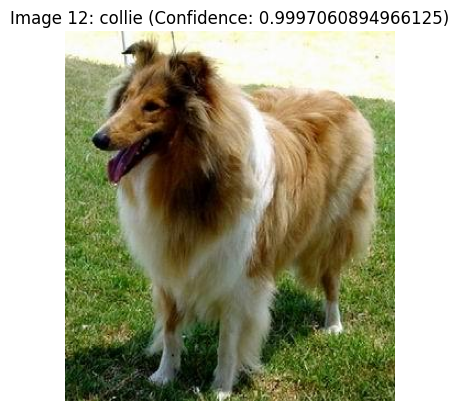

Image n02106030_1005.jpg: collie (Confidence: 0.9997060894966125)
1/1 [==============================] - 0s 67ms/step


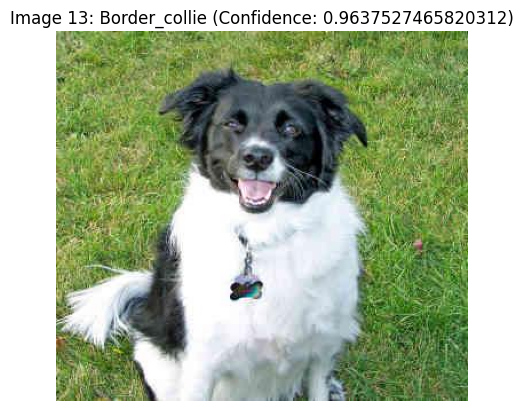

Image n02106166_18.jpg: Border_collie (Confidence: 0.9637527465820312)
1/1 [==============================] - 0s 53ms/step


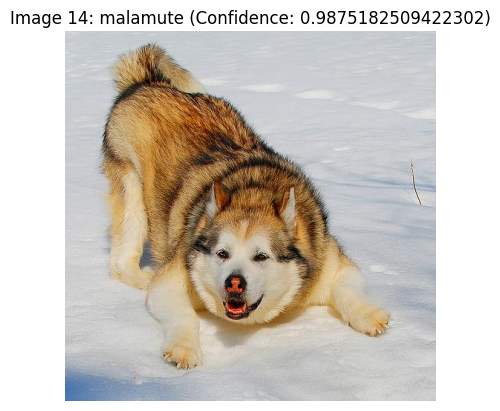

Image n02110063_1034.jpg: malamute (Confidence: 0.9875182509422302)
1/1 [==============================] - 0s 64ms/step


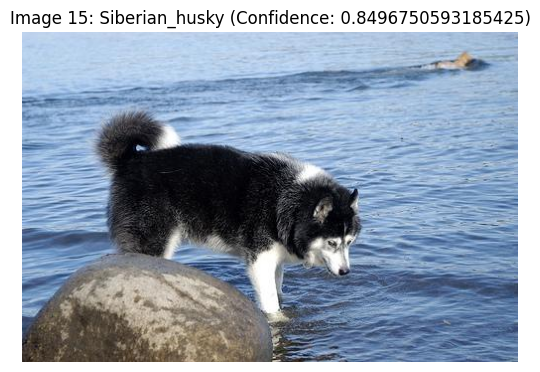

Image n02110185_58.jpg: Siberian_husky (Confidence: 0.8496750593185425)
1/1 [==============================] - 0s 53ms/step


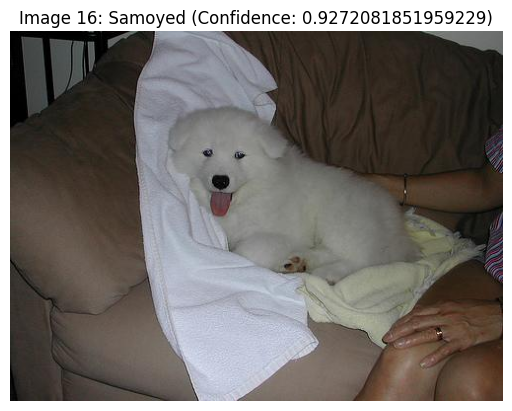

Image n02111889_771.jpg: Samoyed (Confidence: 0.9272081851959229)


In [18]:
# 資料夾路徑設定
folder_path = 'Input'  # 資料夾路徑
predict_from_folder(folder_path)